# Data-analysis of Adult Income

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load CSV into Dataframe from Data folder
adult = pd.read_csv('data/adult.csv')

In [58]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [59]:
# def ConvertToNumerical(column):
#     dict = {}
#     j = 0
#     for i in column:
#         if i not in dict:
#             dict[i] = j
#             j += 1
#     return dict

# adult["workclass"] = adult.workclass.apply(ConvertToNumerical)

# adult.head()

In [60]:
def convert_col_to_numerical(df, col):
    unique_vals = df[col].unique()
    val_dict = {}
    count = 0
    for val in unique_vals:
        val_dict[val] = count
        count += 1
    df[col] = df[col].replace(val_dict)
    return df

adult = convert_col_to_numerical(adult, 'workclass')
adult = convert_col_to_numerical(adult, 'education')
adult = convert_col_to_numerical(adult, 'marital-status')
adult = convert_col_to_numerical(adult, 'occupation')
adult = convert_col_to_numerical(adult, 'relationship')
adult = convert_col_to_numerical(adult, "race")
adult = convert_col_to_numerical(adult, "gender")
adult = convert_col_to_numerical(adult, "native-country")
adult = convert_col_to_numerical(adult, "income")

adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,0,7,0,0,0,0,0,0,0,40,0,0
1,38,0,89814,1,9,1,1,1,1,0,0,0,50,0,0
2,28,1,336951,2,12,1,2,1,1,0,0,0,40,0,1
3,44,0,160323,3,10,1,0,1,0,0,7688,0,40,0,1
4,18,2,103497,3,10,0,3,0,1,1,0,0,30,0,0


<Axes: >

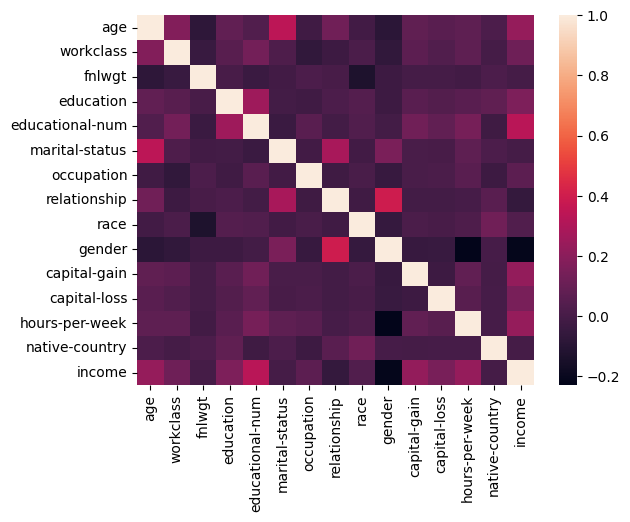

In [61]:
sns.heatmap(adult.corr())

In [64]:
X=adult.drop("income", axis=1)
y=adult["income"]

X_train = X[:5000]
X_test = X[5000:6000]

y_train = y[:5000]
y_test = y[5000:6000]

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64